# Internationalization with Atoti  

This notebook demonstrates how Atoti supports [internationalization](https://en.wikipedia.org/wiki/Internationalization_and_localization) (abbreviated i18n), also known as locale. This means that we can adapt the displayed language in the web application to different languages as necessary.  

<div style="text-align:center"><a href="https://www.atoti.io/?utm_source=gallery&utm_content=internationalization" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Discover-Atoti-now.png" alt="atoti table" /></a></div>

In [1]:
import os
import shutil
from zipfile import ZipFile

import atoti as tt
import wget
from IPython.display import clear_output, display

## Translations  

For internationalization to work, we will need the respective translation file saved as a json, named according to its [locale name](https://www.ibm.com/docs/en/radfws/9.6.1?topic=overview-locales-code-pages-supported), e.g. for French, we have `fr_FR.json`, and for Chinese, we can have `zh-CN.json` or `zh-TW.json`. We do not provide the translations but fortunately, [Google translate](https://translate.google.com/) does.  

### Translating hierarchies  

Simply provide the mappings of the hierarchy names to the translated name under `_HIERARCHIES_`:   
  
<img src="./img/hierarchies_translations.png" width="800px"/>

### Translating levels — Labels in visualizations

Simply provide the mappings of the level names to the translated name under `_LEVELS_`:   

<img src="./img/levels_translations.png" width="800px"/>

### Translating measures

Simply provide the mappings of the measure names to the translated name under `_MEASURES_`:   

<img src="./img/measures_translations.png" width="800px"/>

### Formatting based on locale

We can format the numbers and dates according to the locale under `_FORMATTERS_`:  

<img src="./img/formatters.png" width="800px"/>

Refer to the [fr-FR.json](./translations/fr-FR.json) for the complete translation json.  

In [2]:
# Deleting the .ipynb_checkpoints folder in the translations folder as temporary workarounds
# https://github.com/atoti/atoti/issues/745
trans_ckpt = "translations/.ipynb_checkpoints"

if os.path.exists(trans_ckpt):
    shutil.rmtree(trans_ckpt)
    print("remove checkpoints")

We need to have <a href="https://docs.atoti.io/latest/how_tos/unlock_all_features.html"><img src="https://img.shields.io/badge/🔒-Atoti-291A40" /></a> before we can configure the [i18n](https://docs.atoti.io/latest/api/atoti.I18nConfig.html#atoti.I18nConfig).  
Simply set the `default_locale` to `fr-FR` and point the `translations` to the path where our locale translations reside in.  

In [3]:
session = tt.Session.start(
    tt.SessionConfig(
        user_content_storage="./content",
        i18n=tt.I18nConfig(default_locale="fr-FR", translations="./translations"),
    )
)

Thereafter, we continue with what we usually do with Atoti ~ creating our tables, cubes and analysis... 

In [4]:
# Loading Monte Carlo data - vectors of simulated PL per trade and future time point
mc = session.read_csv(
    "s3://data.atoti.io/notebooks/internationalization/monte-carlo-data.csv",
    keys=["AsOfDate", "TradeId", "TimePoint"],
    table_name="Monte Carlo Data",
    array_separator=";",
    data_types={"TimePoint": tt.type.INT, "AsOfDate": tt.type.LOCAL_DATE},
)

trd = session.read_csv(
    "s3://data.atoti.io/notebooks/internationalization/trades-attributes.csv",
    keys=["AsOfDate", "TradeId"],
    table_name="Trade Attributes",
    data_types={
        "MaturityDate": tt.type.LOCAL_DATE,
        "BreakDate": tt.type.LOCAL_DATE,
        "AsOfDate": tt.type.LOCAL_DATE,
    },
)

mc.join(trd)

cube = session.create_cube(mc, "Monte Carlo Analytics")
# creating a second cube to demonstrate cube name translations
cube2 = session.create_cube(mc, "Risk cube")

The technical data schema is not translated. 

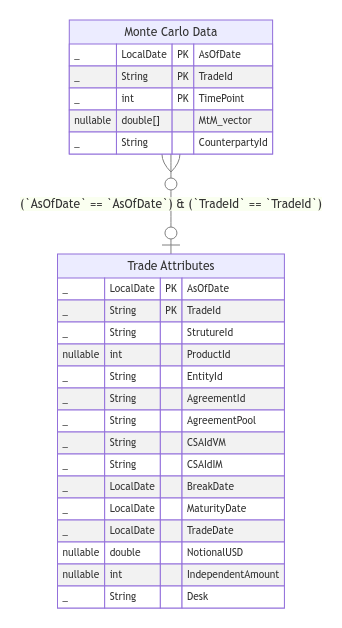

In [5]:
session.tables.schema

In [6]:
h, l, m = cube.hierarchies, cube.levels, cube.measures

m["CE_vector"] = tt.array.positive_values(m["MtM_vector.SUM"])
m["NotionalUSD"] = tt.agg.sum(trd["NotionalUSD"])

### Testing out the translations in both JupyterLab and Atoti UI! 

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
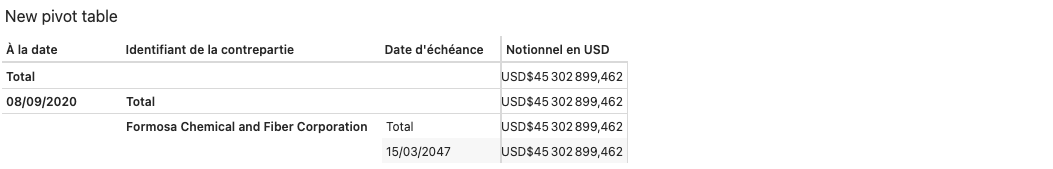

In [7]:
session.widget

In [8]:
session.link / "#/dashboard/84b"

http://localhost:53026/#/dashboard/84b

<div style="text-align:center"><a href="https://www.atoti.io/?utm_source=gallery&utm_content=internationalization" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Your-turn-to-try-Atoti.jpg" alt="atoti table" /></a></div>